<a href="https://colab.research.google.com/github/tbonne/peds/blob/main/docs/introViz/IntroViz4_geoViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/geopandas_logo.png" width="500" alt="colab">
</p>

# <font color='darkorange'>Geo-Visualization</font>


In this notebook we will explore geo-visualization using:

- `GeoPandas`
- `matplotlib`
- `plotly.express`  

This notebook was largely built by Usman Alim (ualim@ucalgary.ca)

Let's load in the libraries that we'll need.

In [8]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

### GeoPandas

- Inherits from pandas. Provides the following two data structures: `GeoSeries` and `GeoDataFrame`.


- A `GeoSeries` is a `Series` where each entry describes a geometric shape in _vector_ format. The following shapes are supported:<br>
  - Points / Multi-points
  - Lines / Multi-lines
  - Polygons / Multi-polygons
  
  
- A `GeoDataFrame` is a `pandas` `DataFrame` with a special 'geometry' column that contains a `GeoSeries`.


- Provides methods to convert between different geospatial coordinate systems.


### <font color='darkorange'>Read GeoJSON Data</font>

GeoJSON is a commonly used format for storing data associated with regions defined through geographic coordinates.
In this notebook, we'll look at the Census by Community dataset for Calgary.

Download the dataset (in GeoJSON format) from the following URL:
[Census by Community 2019](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb)

In [9]:
# Let's read the dataset through geopandas as a GeoDataFrame

census_file = '/content/drive/MyDrive/DATA601/Census_by_Community_2019_20250915.geojson' #you'll have to change this to your path!
cendf = gpd.read_file(census_file)
cendf.head()


:id           :version                      :created_at  \
0  row-htch~ncmf-gwzn  rv-z5j2-9hi7~psmd 2019-09-03 15:59:17.026000+00:00   
1  row-zqyy_ju2s_c5re  rv-viwy.rrv7-q7yy 2019-09-03 15:59:17.026000+00:00   
2  row-wep2.prwp.49vn  rv-sx44-2u73-trw9 2019-09-03 15:59:17.026000+00:00   
3  row-7kr7-i99n~3iat  rv-3nz6.dycy-8sps 2019-09-03 15:59:17.026000+00:00   
4  row-btzw~jxbf.vcyg  rv-qmgj_uwrw_udpj 2019-09-03 15:59:17.026000+00:00   

                       :updated_at        class class_code comm_code  \
0 2019-09-03 15:59:17.026000+00:00  Residential        1.0       LEG   
1 2019-09-03 15:59:17.026000+00:00  Residential        1.0       HPK   
2 2019-09-03 15:59:17.026000+00:00  Residential        1.0       CNS   
3 2019-09-03 15:59:17.026000+00:00  Residential        1.0       MON   
4 2019-09-03 15:59:17.026000+00:00  Residential        1.0       TEM   

            name     sector         srg  ... other_5_14 other_15_19  \
0         LEGACY      SOUTH  DEVELOPING  ...          0           0   
1  HIGHLAND PARK     CENTRE   BUILT-OUT  ...          0           0   
2    CORNERSTONE  NORTHEAST  DEVELOPING  ...          0           0   
3     MONTGOMERY  NORTHWEST   BUILT-OUT  ...          0           0   
4         TEMPLE  NORTHEAST   BUILT-OUT  ...          0           0   

  other_20_24 other_25_34 other_35_44 other_45_54 other_55_64 other_65_74  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

  other_75                                           geometry  
0        0  MULTIPOLYGON (((-114.022 50.86308, -114.02137 ...  
1        0  MULTIPOLYGON (((-114.06916 51.09565, -114.0667...  
2        0  MULTIPOLYGON (((-113.9184 51.17607, -113.91667...  
3        0  MULTIPOLYGON (((-114.16458 51.08145, -114.1644...  
4        0  MULTIPOLYGON (((-113.93513 51.09608, -113.9351...  

[5 rows x 146 columns]

We can see that we created a geopandas dataframe

In [10]:
type(cendf)

geopandas.geodataframe.GeoDataFrame

There's a geometry column which holds the geometric information as a GeoSeries

In [11]:
type(cendf.geometry)

geopandas.geoseries.GeoSeries

It looks like the coordinates for the community polygons are in lat/long format.
The projection can be setup appropriately.
For further details on managing projections, see:
https://geopandas.org/en/stable/docs/user_guide/projections.html

In [12]:
#check the crs
cendf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's convert to world mercator which has units of meters
> You can check out the CRS at: https://epsg.io/3395

In [13]:
#change crs
cendf.geometry = cendf.geometry.to_crs(epsg=3395)

#check that the new crs is setup
cendf.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Finally let's change the index so that it uses the name of the polygon

In [14]:
# Let's index by community name
cendf.set_index('name', inplace=True)

#take a look
cendf.head()

:id           :version  \
name                                                   
LEGACY         row-htch~ncmf-gwzn  rv-z5j2-9hi7~psmd   
HIGHLAND PARK  row-zqyy_ju2s_c5re  rv-viwy.rrv7-q7yy   
CORNERSTONE    row-wep2.prwp.49vn  rv-sx44-2u73-trw9   
MONTGOMERY     row-7kr7-i99n~3iat  rv-3nz6.dycy-8sps   
TEMPLE         row-btzw~jxbf.vcyg  rv-qmgj_uwrw_udpj   

                                   :created_at  \
name                                             
LEGACY        2019-09-03 15:59:17.026000+00:00   
HIGHLAND PARK 2019-09-03 15:59:17.026000+00:00   
CORNERSTONE   2019-09-03 15:59:17.026000+00:00   
MONTGOMERY    2019-09-03 15:59:17.026000+00:00   
TEMPLE        2019-09-03 15:59:17.026000+00:00   

                                   :updated_at        class class_code  \
name                                                                     
LEGACY        2019-09-03 15:59:17.026000+00:00  Residential        1.0   
HIGHLAND PARK 2019-09-03 15:59:17.026000+00:00  Residential        1.0   
CORNERSTONE   2019-09-03 15:59:17.026000+00:00  Residential        1.0   
MONTGOMERY    2019-09-03 15:59:17.026000+00:00  Residential        1.0   
TEMPLE        2019-09-03 15:59:17.026000+00:00  Residential        1.0   

              comm_code     sector         srg comm_structure  ... other_5_14  \
name                                                           ...              
LEGACY              LEG      SOUTH  DEVELOPING   BUILDING OUT  ...          0   
HIGHLAND PARK       HPK     CENTRE   BUILT-OUT          1950s  ...          0   
CORNERSTONE         CNS  NORTHEAST  DEVELOPING          2000s  ...          0   
MONTGOMERY          MON  NORTHWEST   BUILT-OUT          1950s  ...          0   
TEMPLE              TEM  NORTHEAST   BUILT-OUT    1960s/1970s  ...          0   

              other_15_19 other_20_24 other_25_34 other_35_44 other_45_54  \
name                                                                        
LEGACY                  0           0           0           0           0   
HIGHLAND PARK           0           0           0           0           0   
CORNERSTONE             0           0           0           0           0   
MONTGOMERY              0           0           0           0           0   
TEMPLE                  0           0           0           0           0   

              other_55_64 other_65_74 other_75  \
name                                             
LEGACY                  0           0        0   
HIGHLAND PARK           0           0        0   
CORNERSTONE             0           0        0   
MONTGOMERY              0           0        0   
TEMPLE                  0           0        0   

                                                        geometry  
name                                                              
LEGACY         MULTIPOLYGON (((-12692870.539 6563947.026, -12...  
HIGHLAND PARK  MULTIPOLYGON (((-12698121.105 6604958.485, -12...  
CORNERSTONE    MULTIPOLYGON (((-12681337.982 6619187.684, -12...  
MONTGOMERY     MULTIPOLYGON (((-12708742.821 6602449.075, -12...  
TEMPLE         MULTIPOLYGON (((-12683200.328 6605033.675, -12...  

[5 rows x 145 columns]

### <font color='darkorange'>Plot GeoJSON Data</font>

To visualize all the geometric entities, we can use the built-in plot command.

Text(129.73321159744341, 0.5, 'Latitude')

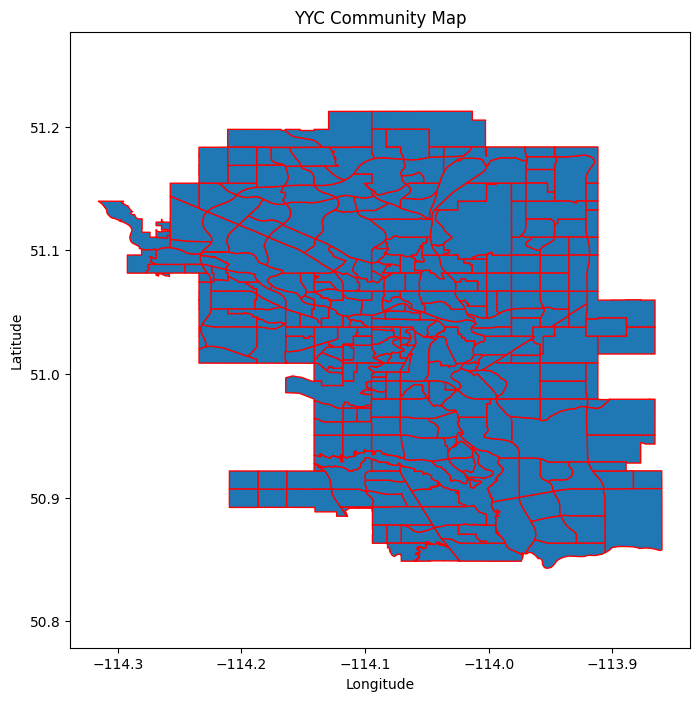

In [39]:

#create an empty plot
fig = plt.figure()

#create one drawing box within that box
axis = fig.add_subplot(1,1,1) #(nrow,ncol,index)

#plot the map within that box
cendf.plot(ax=axis, edgecolor='red')

#make sure the x and y axies are equal
plt.axis('equal')

#add a tile
plt.title('YYC Community Map')

#set the size of the plot
fig.set_size_inches(8,8)


# set x and y label
plt.xlabel('Longitude')
plt.ylabel('Latitude')




<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Try out the above with the lat/long projection (use EPSG 4326)

Now let's look at how we can plot individual polygons.

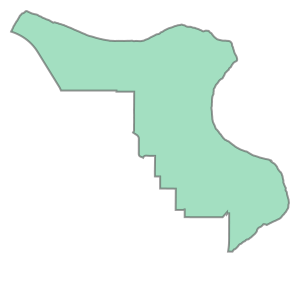

In [16]:
# If we select a particular geometry cell, Jupyter will display it
cendf.loc['INGLEWOOD','geometry']

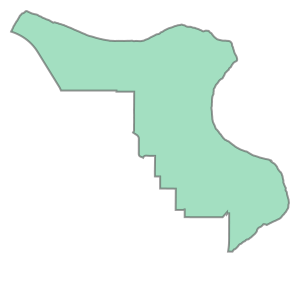

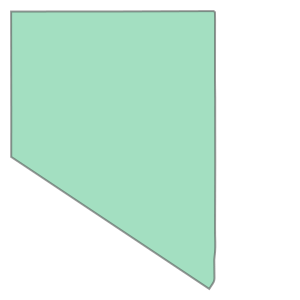

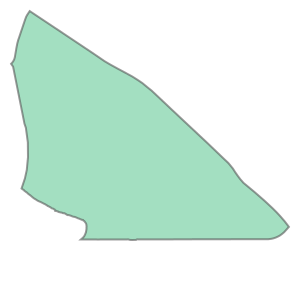

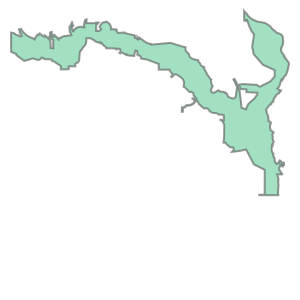

In [17]:
# Let's take a look at a few!
display(cendf.loc['INGLEWOOD','geometry'], cendf.loc['ROCKY RIDGE', 'geometry'],
        cendf.loc['VARSITY', 'geometry'], cendf.loc['FISH CREEK PARK','geometry'])






In [18]:
# Basic methods to compute areas and bounds are also provided.
cendf['geometry'].area

name
LEGACY           1.520236e+07
HIGHLAND PARK    3.458921e+06
CORNERSTONE      1.946280e+07
MONTGOMERY       7.447214e+06
TEMPLE           6.627375e+06
                     ...     
01H              6.392377e+06
HIDDEN VALLEY    1.089955e+07
RIVERBEND        1.025391e+07
RIDEAU PARK      6.725070e+05
FRANKLIN         3.693037e+06
Length: 306, dtype: float64

We can even calculate the distance between polygons.

In [19]:
# Euclidean distance to Downtown for all the communities (based on centroid distances)
cendf['geometry'].distance(cendf.loc['DOWNTOWN COMMERCIAL CORE', 'geometry'])

name
LEGACY           31262.067942
HIGHLAND PARK     5466.599895
CORNERSTONE      20072.336484
MONTGOMERY        7638.984567
TEMPLE           12217.765229
                     ...     
01H              21758.631205
HIDDEN VALLEY    16329.269991
RIVERBEND        10578.986360
RIDEAU PARK       2705.694986
FRANKLIN          6919.843891
Length: 306, dtype: float64

### <font color='darkorange'>Choropleth mapping</font>

When we want to visualize how a value changes between polugons it is often useful to build a choropleth map. In these maps we colour code the polygons by a variable value. Let's take a look below.

First let's install a library that colab is missing.

In [20]:
# Have to install a new library to color code polygons
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 9.5 MB/s eta 0:00:00


We can then specify a column from the GeoDataFrame to visualize. Let's use the count of residences within each polygon: res_cnt

In [21]:
# if we try to get summary stats we see something strange...
cendf.res_cnt.describe()

count     306
unique    207
top       0.0
freq       95
Name: res_cnt, dtype: object

Essentially, the variable has been assigned the datatype 'Object' not a number... let's change that.

In [22]:
#convert to float first then integer
cendf['res_cnt'] = cendf['res_cnt'].astype(float).astype(int) # convert to an integer

#try again
cendf['res_cnt'].describe()




count      306.000000
mean      4193.388889
std       5046.790123
min          0.000000
25%          0.000000
50%       2363.000000
75%       6897.250000
max      25710.000000
Name: res_cnt, dtype: float64

Now that we have a numeric varaible let's create a plot where each polygon is coloured based on the residential count.

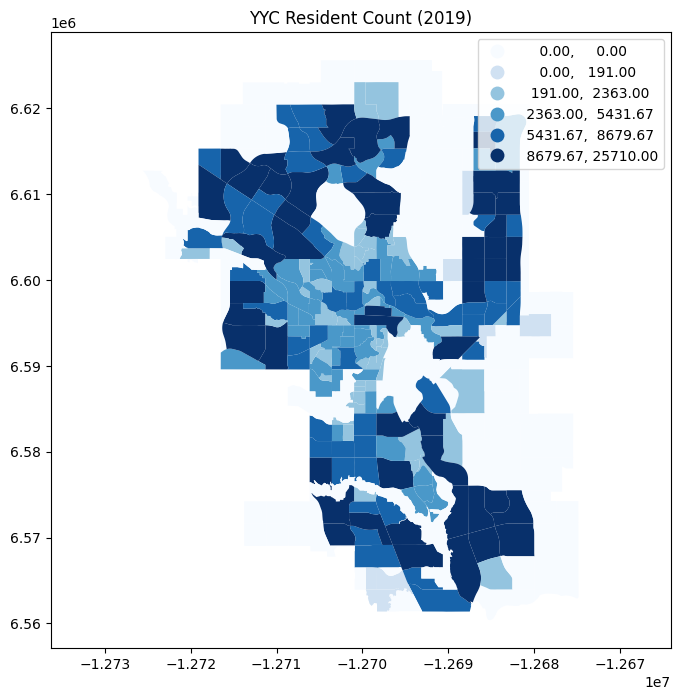

In [23]:

#empty plot with a box to add a plot to
fig = plt.figure()
axis = fig.add_subplot(1,1,1)

#use the plot function: specifcy numeric column, how to classify residential counts to colours (i.e., quantiles, k is the number of classes)
cendf.plot(ax=axis, column='res_cnt', scheme='quantiles', k=6, cmap='Blues', legend=True)

#keep the x and y axes equal
plt.axis('equal')

#title and size
plt.title('YYC Resident Count (2019)')
fig.set_size_inches(8,8)


In the plot above we've used quantiles to help break the polygons up into different classes. Here are some more options we could have tried and the use cases.

| Scheme                      | Description                                                                            | When to use                                                                                  |
| --------------------------- | -------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **quantiles**               | Equal number of polygons in each class (e.g., 20% each for quintiles).                 | Good for showing *rank* or relative standing; can exaggerate differences if data are skewed. |
| **equal\_interval**         | Divides range into equal-width bins.                                                   | Easy to interpret, but may leave some bins with few/no polygons if data are skewed.          |
| **natural\_breaks** (Jenks) | Finds breaks that minimize variance within classes and maximize variance between them. | Good default for skewed data; emphasizes “natural” groupings.                                |
| **fisher\_jenks**           | Similar to natural breaks but optimized using Fisher-Jenks algorithm.                  | More computationally intensive, often very clear groupings.                                  |
| **std\_mean**               | Bins based on standard deviations from the mean.                                       | Good for data with normal-ish distribution, emphasizes how far from average a polygon is.    |
| **boxplot**                 | Uses quartiles and interquartile range (IQR).                                          | Nice when you want consistency with boxplot outlier rules.                                   |
| **percentiles**             | Similar to quantiles, but lets you specify exact percent thresholds.                   | Custom flexibility.                                                                          |
| **maximum\_breaks**         | Finds breakpoints that maximize the differences between groups.                        | Similar use case to Jenks.                                                                   |
| **headtail\_breaks**        | For heavy-tailed distributions; recursively splits head/tail.                          | Great for city-size or population-type data.                                                 |


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Experiment with setting scheme='equal_interval' or another classification method. How does changing the scheme affect the way the polygons are grouped? Does it change your interpretation of where most residences are concentrated?

**Bonus**

See if you can do the same with Edmonton! You should be able to download the geojson file here: https://data.edmonton.ca/City-Administration/City-of-Edmonton-Neighbourhoods/65fr-66s6/

### <font color='darkorange'>Adding a scatterplot on a map</font>

- We can also plot points (given in geographic coordinates) on a base map.
- Let's display micromobility locations on YYC base map (i.e., locations of rentable e-bikes or scooters)
- Download the dataset from the following URL (for offline use):
  [Micromobility Locations](https://data.calgary.ca/Transportation-Transit/Micromobility-Locations-in-Calgary/a3ya-gwgt)
  
  There is also a live feed which at the time of writing this notebook is accessible through the following URL:
  https://data.calgary.ca/resource/8mci-3bzr.csv

In [24]:
# Let's use the live feed
mmlocs = pd.read_csv("https://data.calgary.ca/resource/8mci-3bzr.csv", #read_csv is very flexible... here we are reading directly from a URL!
                     usecols=["timestamp","latitude", "longitude"],    #only read in certain columns
                     parse_dates=['timestamp'])  #automatically convert this column to dates!

#take a look
mmlocs

timestamp   latitude   longitude
0   2025-09-15 13:59:52  51.045907 -114.060728
1   2025-09-15 14:00:03  51.037910 -114.058720
2   2025-09-15 13:59:52  51.041193 -114.054198
3   2025-09-15 14:00:03  51.048050 -114.076590
4   2025-09-15 14:00:03  51.066334 -114.138574
..                  ...        ...         ...
995 2025-09-15 13:59:52  51.041158 -114.056268
996 2025-09-15 14:00:03  51.046124 -114.062639
997 2025-09-15 14:00:03  51.036340 -114.018120
998 2025-09-15 14:00:03  51.045870 -114.068960
999 2025-09-15 14:00:03  51.044665 -114.075179

[1000 rows x 3 columns]

We can see that we have a dataframe with latitude and longitude coordinates!

Let's use this to create a geodataframe object that we can then plot.

In [25]:
from shapely.geometry import Point

#add longitude and latitude together into a list and place it into a new column called coordinates
mmlocs['coordinates'] = list(zip(mmlocs["longitude"], mmlocs["latitude"]))

#once in a list we can convert the list to a point for each row
mmlocs['coordinates'] = mmlocs['coordinates'].apply(Point)

#take a look
mmlocs

timestamp   latitude   longitude  \
0   2025-09-15 13:59:52  51.045907 -114.060728   
1   2025-09-15 14:00:03  51.037910 -114.058720   
2   2025-09-15 13:59:52  51.041193 -114.054198   
3   2025-09-15 14:00:03  51.048050 -114.076590   
4   2025-09-15 14:00:03  51.066334 -114.138574   
..                  ...        ...         ...   
995 2025-09-15 13:59:52  51.041158 -114.056268   
996 2025-09-15 14:00:03  51.046124 -114.062639   
997 2025-09-15 14:00:03  51.036340 -114.018120   
998 2025-09-15 14:00:03  51.045870 -114.068960   
999 2025-09-15 14:00:03  51.044665 -114.075179   

                         coordinates  
0    POINT (-114.0607284 51.0459068)  
1        POINT (-114.05872 51.03791)  
2      POINT (-114.054198 51.041193)  
3        POINT (-114.07659 51.04805)  
4      POINT (-114.138574 51.066334)  
..                               ...  
995  POINT (-114.0562682 51.0411581)  
996    POINT (-114.062639 51.046124)  
997      POINT (-114.01812 51.03634)  
998      POINT (-114.06896 51.04587)  
999    POINT (-114.075179 51.044665)  

[1000 rows x 4 columns]

You should now see a new column with Points in it!

Now we can convert it to a geodataframe.

In [26]:
#specify which column to find the geometry
locsdf = gpd.GeoDataFrame(mmlocs, geometry='coordinates')

#set the coordinate reference system
locsdf = locsdf.set_crs(epsg=4326) # interpret the coordinates as lat/long

#take a look
locsdf.head()

timestamp   latitude   longitude                  coordinates
0 2025-09-15 13:59:52  51.045907 -114.060728  POINT (-114.06073 51.04591)
1 2025-09-15 14:00:03  51.037910 -114.058720  POINT (-114.05872 51.03791)
2 2025-09-15 13:59:52  51.041193 -114.054198   POINT (-114.0542 51.04119)
3 2025-09-15 14:00:03  51.048050 -114.076590  POINT (-114.07659 51.04805)
4 2025-09-15 14:00:03  51.066334 -114.138574  POINT (-114.13857 51.06633)

Now that we have a geodataframe let's plot it!

This time, let's add a base map so we can see where the points fall within the city. To do this we'll call the plot function twice adding layers to the map.

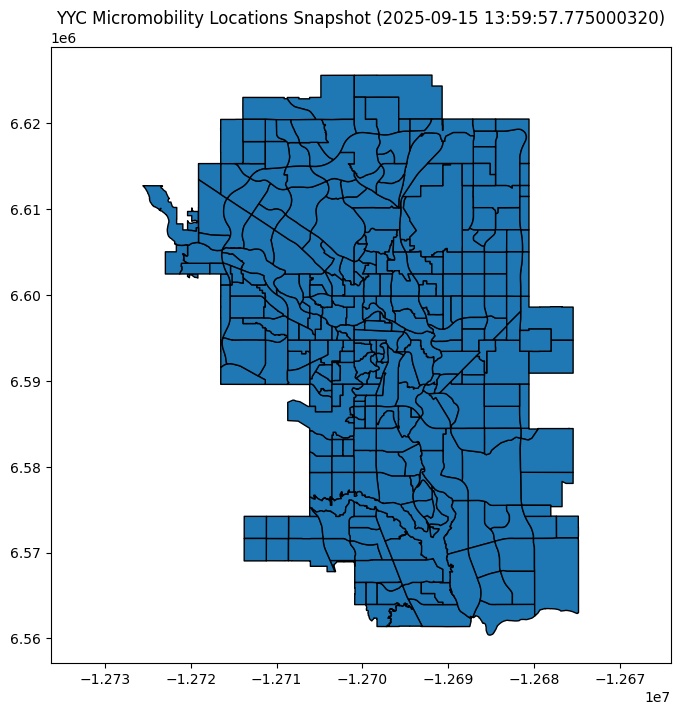

In [27]:
#create an empty plot
fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# set the projection to mercator (always good to make sure your data is in the same crs)
cendf = cendf.to_crs(epsg=3395)
locsdf = locsdf.to_crs(epsg=3395)

#plot the layers we want (order matters here)
locsdf.plot(ax=axis, markersize=5, color="red")
cendf.plot(ax=axis, edgecolor='black')


#title/size
plt.axis('equal')
plt.title('YYC Micromobility Locations Snapshot (' + str(locsdf['timestamp'].mean()) + ')')
fig.set_size_inches(8,8)

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>


See if you can do the same for Edmonton again! Below is some code for the micromobility data in Edmonton, just to get you started.



In [28]:
csv_url = "https://data.edmonton.ca/resource/vq44-ni9f.csv"
df = pd.read_csv(csv_url)
print(df.head())

                                      row_id vendor vehicle_type  \
0  Bird-7b4b5bce-1f04-4305-a8d9-9804f0cf111f   Bird      scooter   
1  Lime-f16c8f31-5475-429a-9495-9a6a207ae0f8   Lime      scooter   
2  Lime-23fa739f-4702-4fd3-916d-dbb1cc375933   Lime      scooter   
3  Lime-3012d246-0026-49cc-b9ec-dc26b1f7785f   Lime       e-bike   
4  Bird-e6d2edde-27a8-4097-badd-960938215ca0   Bird      scooter   

                            instance_id                timestamp  \
0  7b4b5bce-1f04-4305-a8d9-9804f0cf111f  2025-09-15T13:59:35.000   
1  f16c8f31-5475-429a-9495-9a6a207ae0f8  2025-09-15T14:00:09.000   
2  23fa739f-4702-4fd3-916d-dbb1cc375933  2025-09-15T14:00:09.000   
3  3012d246-0026-49cc-b9ec-dc26b1f7785f  2025-09-15T14:00:09.000   
4  e6d2edde-27a8-4097-badd-960938215ca0  2025-09-15T13:59:35.000   

   epoch_timestamp  is_reserved_flag  is_disabled_flag   latitude   longitude  \
0       1757966375                 0                 0  53.513176 -113.518816   
1       1757966409  

### <font color='darkorange'>Mapping in Plotly</font>

- Matplotlib maps are good for offline use, lack interactivity.

- Plotly uses _tiled maps_ provided by mapbox as the underlying interactive base maps.
  - Some mapbox base maps require an [access token](https://docs.mapbox.com/help/getting-started/access-tokens/) but there are also free ones.
  - Untiled (outline) maps are also supported.
- We'll look at the following examples that work with geopandas dataframes:
  - [px.scatter_mapbox()](https://plotly.com/python/scattermapbox/)
  - [px.choropleth_mapbox()](https://plotly.com/python/mapbox-county-choropleth/)

In [29]:
#Let's use a simple geographic projection (WGS84)
locsdf = locsdf.to_crs(epsg=4326)

#Create a spatial scatter plot
fig = px.scatter_mapbox(locsdf,
                        lat=locsdf.geometry.y,
                        lon=locsdf.geometry.x,
                        hover_name="timestamp",
                        center={"lat": 51.0486, "lon": -114.0708}, # Calgary
                        mapbox_style='open-street-map', #this will be the background
                        zoom=9, #try changing this to zoom in or out
                        title='YYC Micromobility Locations Snapshot (' + str(locsdf['timestamp'].mean()) + ')')

#add some margins around the plotting area (helps avoid labels getting cut off)
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50},
                  autosize=True,
                  height=600 )
fig.show()

Let's do the same thing, but this time generate a choropleth map.

In [30]:
#Let's use a simple geographic projection (WGS84)
cendf = cendf.to_crs(epsg=4326)

#Create a choropleth plot
fig = px.choropleth_mapbox(data_frame = cendf, #dataframe with polygons and attributes
                           geojson=cendf, #geometry to draw the polygons
                           locations=cendf.index, #which rows in the data_frame correspond to polygons in the geojson data
                           color="res_cnt", #variable used to fill colours
                           color_continuous_scale = 'YlGn', #yellow to green color map (to see more options: https://colorbrewer2.org/)
                           center={"lat": 51.0486, "lon": -114.0708}, # Calgary
                           mapbox_style="carto-positron", #free background base map
                           opacity=0.5, #how transparent the polygons are
                           zoom=9,
                           title = 'YYC Resident Count (2019)')

#add some margins around the plotting area (helps avoid labels getting cut off)
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50},
                  autosize=True,
                  height=600 )
fig.show()


### <font color='darkorange'>Search for your own geo-datastes (Optional!)</font>

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Feel free to go to www.naturalearthdata.com and in the search bar, search for some spatial data that might be of interest to you!

E.g., Antarctic ice shelves, antarctic boundaries, protected areas, etc...

Just to get you started here's an example with coral reefs around the world!

Download reef data:

https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-reefs/

Download country data:

https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/



   scalerank featurecla  min_zoom  \
0          6      Reefs       5.0   
1          6      Reefs       5.0   
2          6      Reefs       5.0   
3          6      Reefs       5.0   
4          6      Reefs       5.0   

                                            geometry  
0  LINESTRING (-170.61214 25.48105, -170.58137 25...  
1  LINESTRING (-166.26731 23.87844, -166.22592 23...  
2  LINESTRING (-175.79301 27.77699, -175.73537 27...  
3  LINESTRING (-175.87081 27.78916, -175.90176 27...  
4  LINESTRING (-177.34847 28.18787, -177.32033 28...  
EPSG:4326


<Axes: >

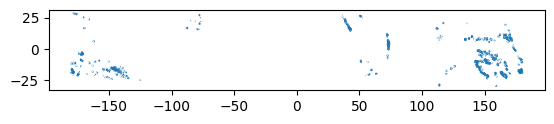

In [40]:
import geopandas as gpd
import requests
import zipfile
import io

#import the data into a geopandas object
# Note: here we are reading directly into a geodataframe from a zip file that contains a shapfile within! very convenient...
reefs = gpd.read_file("/content/drive/MyDrive/DATA601/ne_10m_reefs.zip")

print(reefs.head())
print(reefs.crs)  # check the coordinate reference system
reefs.plot()


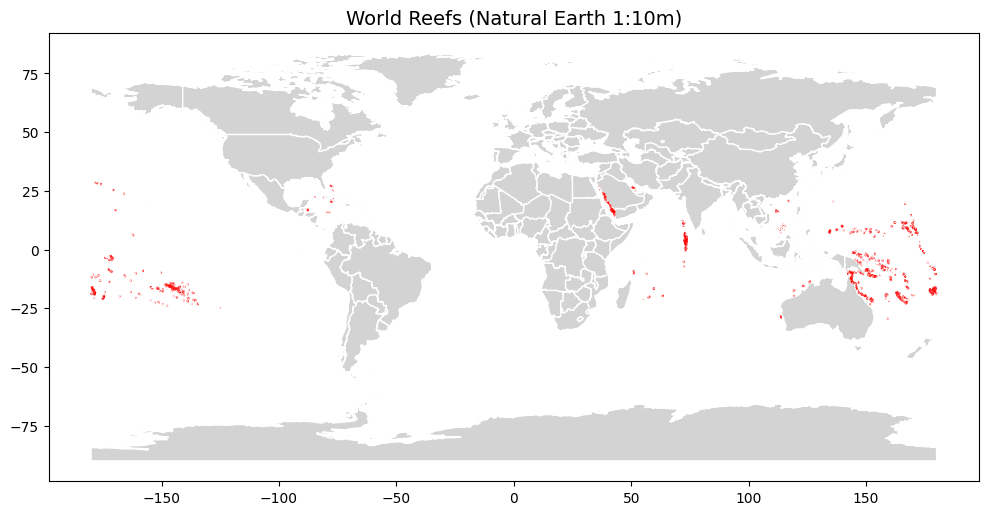

In [42]:
# Load a world background (built into GeoPandas: naturalearth_lowres)
world = gpd.read_file("/content/drive/MyDrive/DATA601/ne_10m_admin_0_countries.zip")

# Make sure both are in the same CRS (coordinate reference system)
reefs = reefs.to_crs(world.crs)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgrey", edgecolor="white")
reefs.plot(ax=ax, color="red", markersize=1, alpha=0.7)

ax.set_title("World Reefs (Natural Earth 1:10m)", fontsize=14)
plt.show()

### <font color='darkorange'>Further reading</font>

In this notebook, we've explored libraries that support geographic data visualization. In particular, we've looked at [GeoPandas](http://geopandas.org/) and its integration with [matplotlib](http://geopandas.org/mapping.html).

[Plotly](https://plot.ly/python/maps/) supports interactive geo-visualization capabilities on top of base maps provided by [mapbox](https://www.mapbox.com/).